<a href="https://colab.research.google.com/github/gmehra123/course1/blob/master/Tree_Based_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tree Based models

### Decision Trees for classification
* Given a labelled dataset a classification tree asks a set of if-else questions to infer the labels.
* Can capture non-linear features.
* Dont require scaling.
* Each if else question that the tree has uses 1 feature and 1 split point
* Tree has a max_depth paramenter
* A classification tree makes rectangular decision boundaries, because at each split only 1 feature is involved.

#### Basic Classification Tree

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np


In [3]:
cancer=pd.read_csv('https://assets.datacamp.com/production/repositories/1796/datasets/0eb6987cb9633e4d6aa6cfd11e00993d2387caa4/wbc.csv')

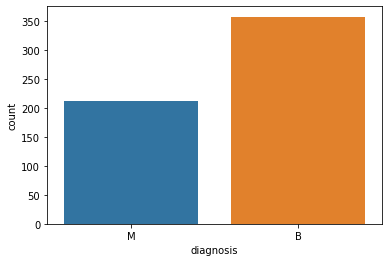

In [6]:
# Counting the number of Malignant and bening
sns.countplot(x='diagnosis',data=cancer)

In [10]:
cancer['diagnosis']=np.where(cancer.diagnosis=='M',1,0)

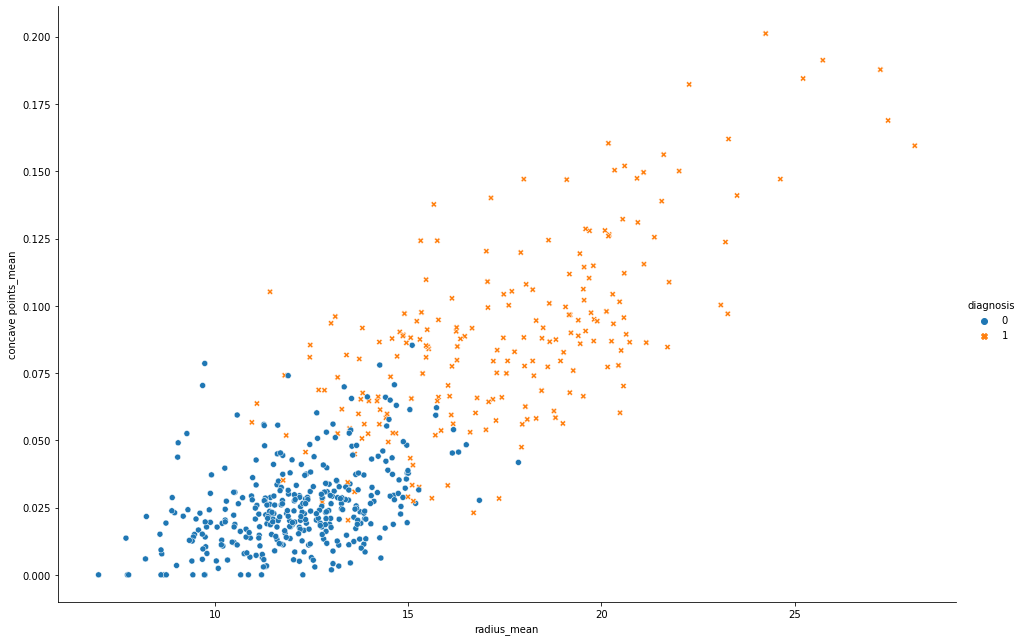

In [22]:
sns.relplot(x='radius_mean',y='concave points_mean',kind='scatter',hue='diagnosis',style='diagnosis',height=9,aspect=1.5,data=cancer)

In [41]:
X=cancer.loc[:,['radius_mean','concave points_mean']]
y=cancer.diagnosis

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [43]:
dt=DecisionTreeClassifier(max_depth=6)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [44]:
y_pred=dt.predict(X_test)

In [45]:
accuracy_score(y_test,y_pred)

0.8859649122807017

#### Classification tree learning
* Root node is the 1st node and has no parent nodes.
* Leaf nodes are the last nodes and have no children. They are the purest nodes given the criteria (max_depth, entropy etc).
* The tree chooses which feature to split on based on maximizing some information gain criteria
* IG metrics (Gini index and entropy)

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [49]:
y_pred1=logreg.predict(X_test)
accuracy_score(y_test,y_pred1)

0.8771929824561403

### Regression Tree
* Decision trees can be used for regression problems
* In this case since the target variable/label is continous its impurity is measured using the Mean Squared Error metric 
* The predicted valu is the average of the target value in that leaf

In [52]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=8,min_samples_leaf=0.13)

In [53]:
auto=pd.read_csv('https://assets.datacamp.com/production/repositories/1796/datasets/3781d588cf7b04b1e376c7e9dda489b3e6c7465b/auto.csv')

Text(0, 0.5, 'MPG')

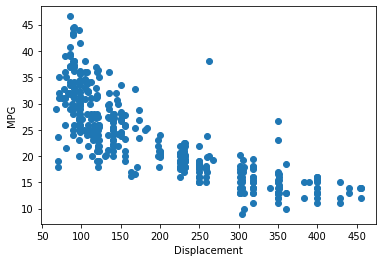

In [56]:
fig,ax=plt.subplots()
ax.scatter(x=auto.displ,y=auto.mpg)
ax.set_xlabel('Displacement')
ax.set_ylabel('MPG')

In [62]:
X=auto.loc[:,['displ']]
y=auto.mpg
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [65]:
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
lr=LinearRegression()

In [73]:
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)

In [74]:
from sklearn.metrics import mean_squared_error as MSE

In [76]:
mse_lr=MSE(y_test,y_pred_lr)
mse_dt=MSE(y_test,y_pred_dt)

In [78]:
print('MSE Linear Regression is ',mse_lr)
print('MSE Decison Tree is ',mse_dt )

MSE Linear Regression is  17.500546185620014
MSE Decison Tree is  13.41236046708605


Text(0, 0.5, 'MPG')

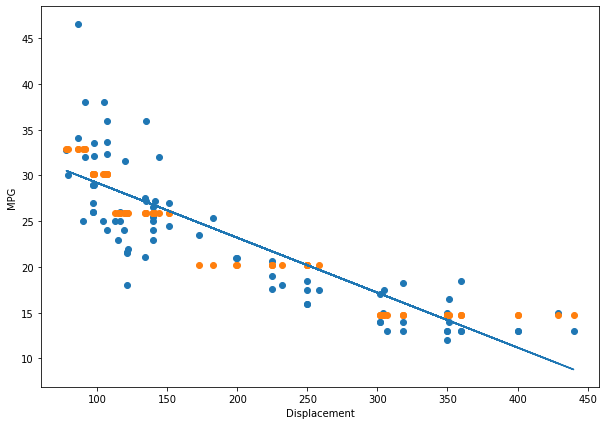

In [86]:
fig,ax=plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(10)
ax.scatter(x=X_test,y=y_test)
ax.plot(X_test,y_pred_lr,label='Regression_prediction')
ax.scatter(X_test,y_pred_dt,label='Decision Tree prediction')
ax.set_xlabel('Displacement')
ax.set_ylabel('MPG')


In [72]:
#from sklearn.model_selection import KFold,cross_val_score